In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=10)
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer # for missing values
from sklearn.compose import make_column_transformer
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [40]:
z = pd.read_csv('Data.csv')
print("readed")


readed


In [32]:
z

,Age,Income,student,credit,class
0,Youth,high,no,Fair,No
1,Youth,high,no,excellent,No
2,Middle-Aged,high,no,Fair,Yes
3,Senior,medium,no,Fair,Yes
4,Senior,low,yes,Fair,Yes
5,Senior,low,yes,excellent,No
6,Middle-Aged,low,yes,excellent,Yes
7,Youth,medium,no,Fair,No
8,Youth,low,yes,Fair,Yes
9,Senior,medium,yes,Fair,Yes


In [56]:
ohe = OneHotEncoder()
imp = SimpleImputer()
df_cols = z.columns
df_cols

Index(['Age ', 'Income', 'student ', 'credit', 'class'], dtype='object')

In [71]:
cs = make_column_transformer(
    (ohe, ['Age ', 'Income', 'student ', 'credit']))

In [72]:
n_samples = cs.fit_transform(z)
n_samples

array([[0., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.]])

In [73]:
ct = make_column_transformer(
    (ohe, ['class']))

In [74]:
n_targets = ct.fit_transform(z)
n_targets

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [75]:
x=[[0,0],[1,1]]
y=[0,1]

In [77]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x,y)

In [78]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(n_samples,n_targets)

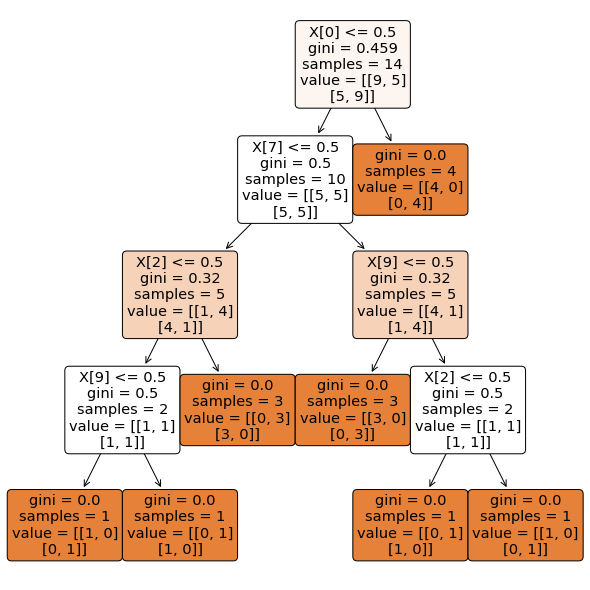

In [82]:
fig = plt.figure(figsize = [8,8])
axes = fig.add_axes([0,0,1,1])
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()